<a href="https://colab.research.google.com/github/Git-Hub-Pro/ML-using-keras/blob/master/Using_pre_trained_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# google colab에 gdrive mount 하기(아래 링크 클릭후, 내용 복사 후 입력하기)
# 12시간 지나면 자동으로 해제되어서 지속적으로 로그인을 해주어야 한다.
from google.colab import drive
drive.mount('/content/gdrive/')

In [0]:
import keras
import numpy as np
# inception_v3 : google에서 만듬,resnet50 : ILVRC 2015년 우승 모델,mobilenet : 빠른 인식을 위해 고안된 모델
from keras.applications import vgg16, inception_v3, resnet50, mobilenet
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [0]:
vgg_model = vgg16.VGG16(weights='imagenet')

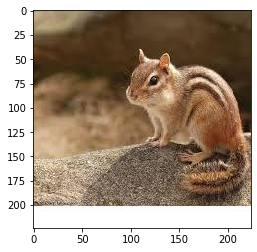

In [11]:
filename = "/content/gdrive/My Drive/data/darangee.jpeg"

org = load_img(filename,target_size=(224,224))

img = img_to_array(org)
plt.imshow(np.uint8(img))

In [12]:
img.shape

(224, 224, 3)

In [15]:
x = np.expand_dims(img,axis=0)

x = vgg16.preprocess_input(x)

pred = vgg_model.predict(x)

from keras.applications.imagenet_utils import decode_predictions

label = decode_predictions(pred)
print(label)

[[('n02356798', 'fox_squirrel', 0.9515307), ('n01877812', 'wallaby', 0.023125492), ('n02325366', 'wood_rabbit', 0.0138195325), ('n02326432', 'hare', 0.004108304), ('n01883070', 'wombat', 0.0014842711)]]


In [16]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
# transfer learning - Fine tuning
# 1. layer -> not trainable (trainable params를 사용하지 않는 것)
#for layer in vgg_model.layers:
#    layer.trainable = False
# 2. bottle neck feature
# 모델을 잘라서 붙이는 방식.